<a href="https://colab.research.google.com/github/poonachaka/skill/blob/main/EEG_Classification9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EEG Classification**

In [ ]:
!pip install mne scipy matplotlib wfdb numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


Saving S002R02.edf to S002R02 (3).edf
Extracting EDF parameters from /content/S002R02.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


Text(0, 0.5, 'Amplitude')

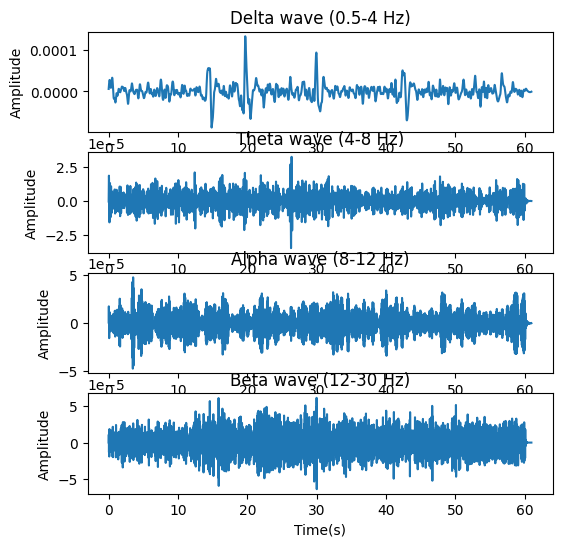

In [ ]:
from google.colab import files
files.upload()
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter , filtfilt
import mne

raw=mne.io.read_raw_edf("/content/S002R02.edf",preload=True)

data_fp1=raw.get_data(picks=['Fp1.']).flatten()

fs=int(raw.info['sfreq'])

t=np.arange(len(data_fp1))/fs

order=4

def bandpass_filter(data,lowcut,highcut,fs,order=4):
  nyquist=0.5*fs
  low=lowcut/nyquist
  high=highcut/nyquist
  b,a=butter(order,[low,high],btype='band')
  return filtfilt(b,a,data)

delta_wave=bandpass_filter(data_fp1,0.5,4,fs,order)
theta_wave=bandpass_filter(data_fp1,4,8,fs,order)
alpha_wave=bandpass_filter(data_fp1,8,12,fs,order)
beta_wave=bandpass_filter(data_fp1,12,30,fs,order)

plt.figure(figsize=(6,6))

plt.subplot(4,1,1)
plt.plot(t,delta_wave)
plt.title('Delta wave (0.5-4 Hz)')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

plt.subplot(4,1,2)
plt.plot(t,theta_wave)
plt.title('Theta wave (4-8 Hz)')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

plt.subplot(4,1,3)
plt.plot(t,alpha_wave)
plt.title('Alpha wave (8-12 Hz)')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

plt.subplot(4,1,4)
plt.plot(t,beta_wave)
plt.title('Beta wave (12-30 Hz)')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')